# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 568


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city

    city_url = f"{url}appid={weather_api_key}&units={units}&q="
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
    
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | alice springs
Processing Record 2 of Set 1 | inhambane
Processing Record 3 of Set 1 | uturoa
Processing Record 4 of Set 1 | yellowknife
Processing Record 5 of Set 1 | phan thiet
Processing Record 6 of Set 1 | kimbe
Processing Record 7 of Set 1 | taiohae
City not found. Skipping...
Processing Record 8 of Set 1 | edinburgh of the seven seas
Processing Record 9 of Set 1 | flying fish cove
Processing Record 10 of Set 1 | hithadhoo
Processing Record 11 of Set 1 | cidreira
Processing Record 12 of Set 1 | margaret river
Processing Record 13 of Set 1 | kostomuksha
Processing Record 14 of Set 1 | fiambala
Processing Record 15 of Set 1 | moranbah
Processing Record 16 of Set 1 | howard springs
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | grytviken
Processing Record 19 of Set 1 | maceio
Processing Record 20 of Set 1 | rio gallegos
Processing Record 21 of Set 1 | tofol
Processing Rec

Processing Record 39 of Set 4 | castillos
Processing Record 40 of Set 4 | kodiak
Processing Record 41 of Set 4 | tranovaho
City not found. Skipping...
Processing Record 42 of Set 4 | tomatlan
Processing Record 43 of Set 4 | floro
Processing Record 44 of Set 4 | mournies
Processing Record 45 of Set 4 | happy valley-goose bay
Processing Record 46 of Set 4 | urangan
Processing Record 47 of Set 4 | saratamata
City not found. Skipping...
Processing Record 48 of Set 4 | glace bay
Processing Record 49 of Set 4 | new norfolk
Processing Record 0 of Set 5 | pingliang
Processing Record 1 of Set 5 | shipunovo
Processing Record 2 of Set 5 | coquimbo
Processing Record 3 of Set 5 | ahau
City not found. Skipping...
Processing Record 4 of Set 5 | fortuna foothills
Processing Record 5 of Set 5 | saint-francois
Processing Record 6 of Set 5 | argo
Processing Record 7 of Set 5 | pilas
Processing Record 8 of Set 5 | qaqortoq
Processing Record 9 of Set 5 | casper
Processing Record 10 of Set 5 | kapa'a
Proces

Processing Record 26 of Set 8 | queenstown
Processing Record 27 of Set 8 | jeddah
Processing Record 28 of Set 8 | salekhard
Processing Record 29 of Set 8 | creel
Processing Record 30 of Set 8 | kodinsk
Processing Record 31 of Set 8 | hlusk
Processing Record 32 of Set 8 | yuzhno-kurilsk
Processing Record 33 of Set 8 | margate
Processing Record 34 of Set 8 | retreat
Processing Record 35 of Set 8 | merizo village
Processing Record 36 of Set 8 | kununurra
Processing Record 37 of Set 8 | taoudenni
Processing Record 38 of Set 8 | camargo
Processing Record 39 of Set 8 | jiazi
Processing Record 40 of Set 8 | al fahahil
Processing Record 41 of Set 8 | bel ombre
Processing Record 42 of Set 8 | panama city beach
Processing Record 43 of Set 8 | selfoss
Processing Record 44 of Set 8 | palikir - national government center
Processing Record 45 of Set 8 | vila franca do campo
Processing Record 46 of Set 8 | garissa
Processing Record 47 of Set 8 | mitu
Processing Record 48 of Set 8 | kayangel
Processin

-----------------------------
Data Retrieval Complete      
-----------------------------


In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=['City', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 
                                                'Wind Speed', 'Country', 'Date'])


# Show Record Count
city_data_df.count()

City          543
Lat           543
Lng           543
Max Temp      543
Humidity      543
Cloudiness    543
Wind Speed    543
Country       543
Date          543
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alice springs,-23.7000,133.8833,67.55,24,0,16.11,AU,1683697793
1,inhambane,-23.8650,35.3833,70.92,83,1,7.65,MZ,1683697793
2,uturoa,-16.7333,-151.4333,81.39,78,83,11.07,PF,1683697793
3,yellowknife,62.4560,-114.3525,48.72,61,20,3.44,CA,1683697793
4,phan thiet,10.9333,108.1000,87.24,66,51,10.02,VN,1683697582


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alice springs,-23.7000,133.8833,67.55,24,0,16.11,AU,1683697793
1,inhambane,-23.8650,35.3833,70.92,83,1,7.65,MZ,1683697793
2,uturoa,-16.7333,-151.4333,81.39,78,83,11.07,PF,1683697793
3,yellowknife,62.4560,-114.3525,48.72,61,20,3.44,CA,1683697793
4,phan thiet,10.9333,108.1000,87.24,66,51,10.02,VN,1683697582


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

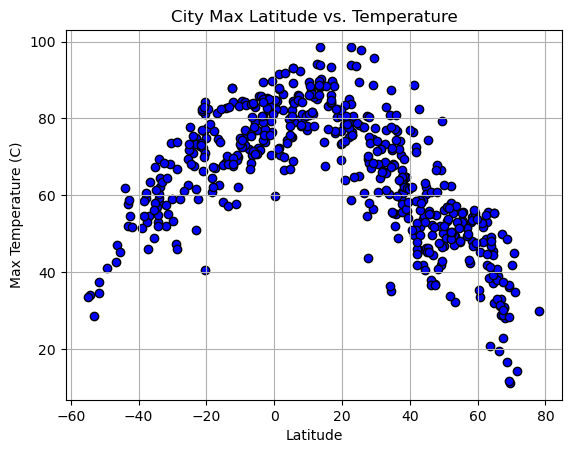

In [14]:
# Build scatter plot for latitude vs. temperature
x_val = city_data_df["Lat"]
y_val = city_data_df["Max Temp"]
plt.scatter(x_val, y_val, color = "blue", edgecolor = "black", marker = "o")

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

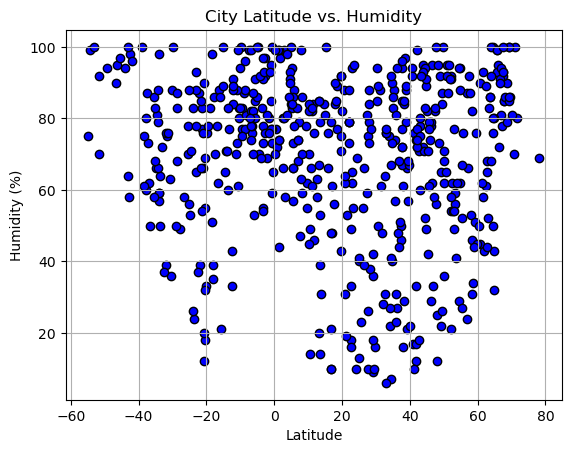

In [16]:
# Build the scatter plots for latitude vs. humidity
x_val = city_data_df["Lat"]
y_val = city_data_df["Humidity"]
plt.scatter(x_val, y_val, edgecolor = "black", color = "blue", marker = "o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()




# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

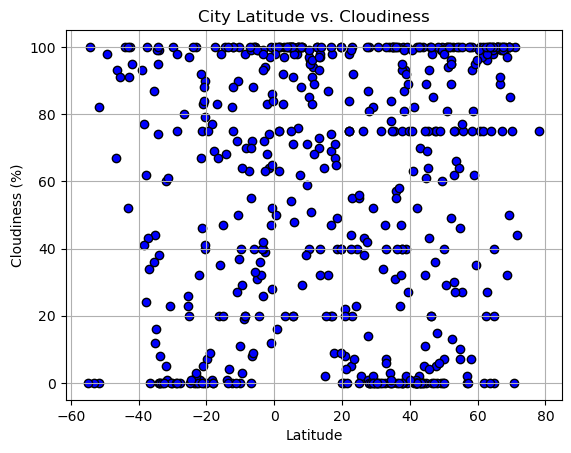

In [17]:
# Build the scatter plots for latitude vs. cloudiness
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x, y, edgecolor = "black", color = "blue")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

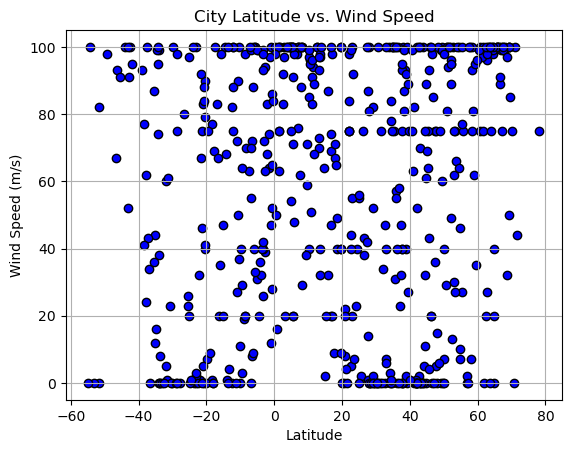

In [18]:
# Build the scatter plots for latitude vs. wind speed
x = city_data_df["Lat"]
y = city_data_df["Cloudiness"]
plt.scatter(x, y, edgecolor = "black", color = "blue")


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [19]:
# Define a function to create Linear Regression plots
def lin_regression(x_val, y_val, xlab, ylab, coord):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    
    regression_vals = x_val * slope + intercept
    line = "y = " + str(round(slope, 2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_val, y_val, edgecolor = "black", marker = "o", color = "blue")
    plt.plot(x_val, regression_vals, "r-")
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.annotate(line, coord, color = "red")
    print("The r-value is", rvalue**2)

In [20]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,yellowknife,62.4560,-114.3525,48.72,61,20,3.44,CA,1683697793
4,phan thiet,10.9333,108.1000,87.24,66,51,10.02,VN,1683697582
11,kostomuksha,64.5710,30.5767,37.08,100,100,4.88,RU,1683697794
15,albany,42.6001,-73.9662,45.81,71,2,1.01,US,1683697656
19,tofol,5.3248,163.0078,82.18,83,100,3.44,FM,1683697795


In [21]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,alice springs,-23.7000,133.8833,67.55,24,0,16.11,AU,1683697793
1,inhambane,-23.8650,35.3833,70.92,83,1,7.65,MZ,1683697793
2,uturoa,-16.7333,-151.4333,81.39,78,83,11.07,PF,1683697793
5,kimbe,-5.5502,150.1429,83.08,85,100,1.25,PG,1683697794
6,edinburgh of the seven seas,-37.0676,-12.3116,54.52,62,34,21.77,SH,1683697794


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.704272802066172


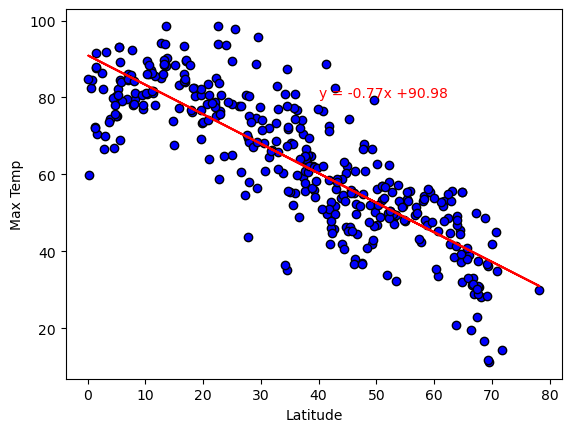

In [22]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Max Temp"]
lin_regression(x, y, "Latitude", "Max Temp", (40, 80))
plt.show()

The r-value is 0.6395530466122645


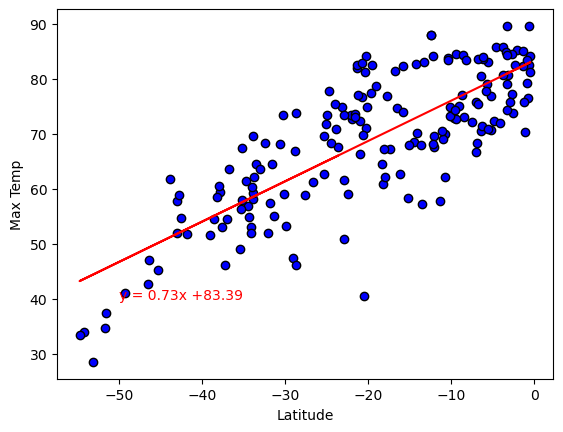

In [23]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Max Temp"]
lin_regression(x, y, "Latitude", "Max Temp", (-50, 40))
plt.show()

**Discussion about the linear relationship:** There is a strong relationship between rising latitude and temperatures.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.004351272406915639


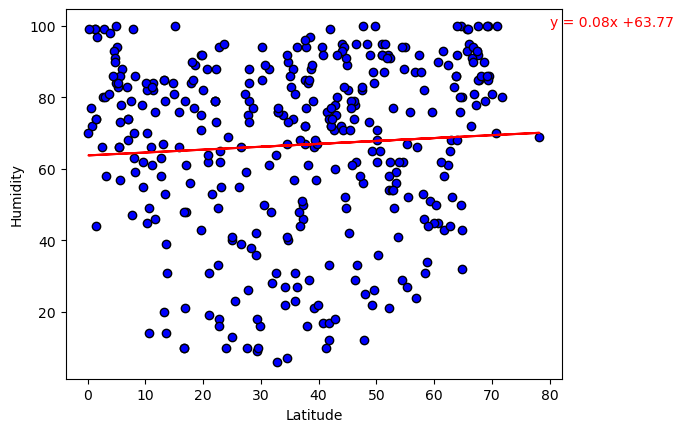

In [24]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Humidity"]
lin_regression(x, y, "Latitude", "Humidity", (80, 100))
plt.show()

The r-value is 0.005513583649060986


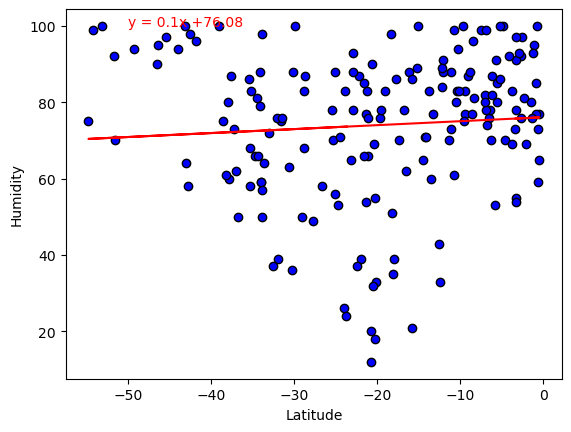

In [25]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Humidity"]
lin_regression(x, y, "Latitude", "Humidity", (-50, 100))
plt.show()

**Discussion about the linear relationship:** There is not a strong relationship between rising latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 4.4228224406972114e-05


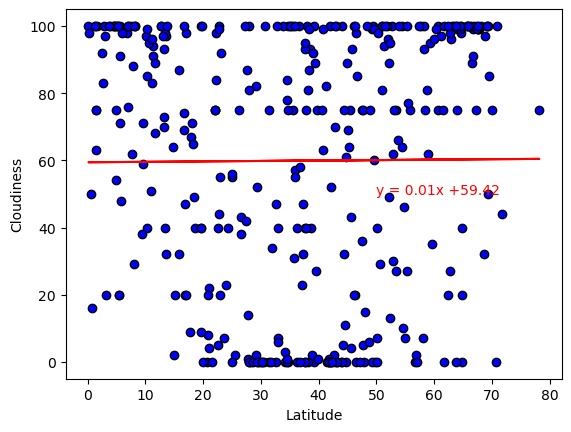

In [26]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Cloudiness"]
lin_regression(x, y, "Latitude", "Cloudiness", (50, 50))
plt.show()

The r-value is 0.0043516104068909035


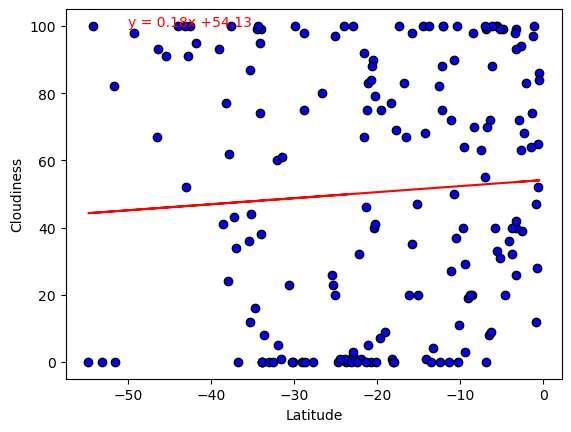

In [27]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Cloudiness"]
lin_regression(x, y, "Latitude", "Cloudiness", (-50, 100))
plt.show()

**Discussion about the linear relationship:** There is not a strong relationship between rising latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.0006176780005381118


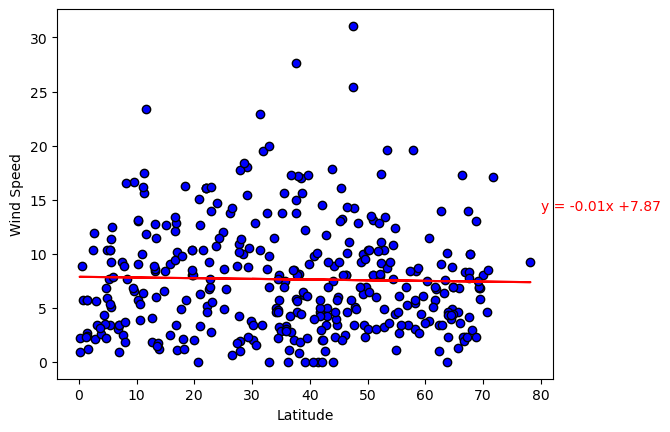

In [28]:
# Northern Hemisphere
x = northern_hemi_df["Lat"]
y = northern_hemi_df["Wind Speed"]
lin_regression(x, y, "Latitude", "Wind Speed", (80, 14))
plt.show()

The r-value is 0.004966122192280912


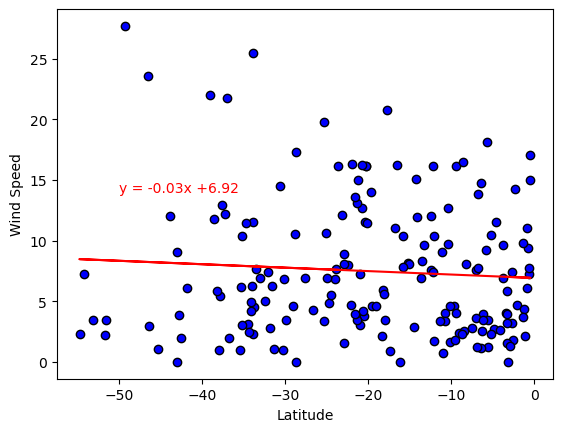

In [29]:
# Southern Hemisphere
x = southern_hemi_df["Lat"]
y = southern_hemi_df["Wind Speed"]
lin_regression(x, y, "Latitude", "Wind Speed", (-50, 14))
plt.show()

**Discussion about the linear relationship:** There is not a strong relationship between rising latitude and wind speeds.